In [1]:
# %%
from genericpath import isfile
import os
import sys
import shutil
import subprocess
import numpy as np
from datetime import datetime
from joblib import Parallel, delayed




EMDB_PDB_ids_training = ["0026_6gl7", "7573_6crv",  "0665_6oa9", "0038_6gml", "0071_6gve", "0093_6gyn", "0094_6gyo", "0132_6h3c", "0234_6hjn", "0408_6nbd", "0415_6nbq", "4288_6fo2", "0452_6nmi", "0490_6nr8", "0492_6nra", "0567_6o0h", "0589_6nmi", "0592_6o1m", "0776_6ku9", "10049_6rx4", "10069_6s01", "10100_6s5t", "10105_6s6t", "10106_6s6u", "10273_6sof", "10279_6sp2", "10324_6swe", "10333_6swy", "10418_6t9n", "10534_6tni", "10585_6ttu", "10595_6tut", "10617_6xt9", "20145_6oo4", "20146_6oo5", "20189_6osy", "20234_6p19", "20249_6p4h", "20254_6p5a", "20259_6p62", "20270_6p7v", "20271_6p7w", "20352_6pik", "20521_6pxm", "20986_6v0b", "21012_6v1i", "21107_6v8o", "21144_6vbu", "21391_6vv5", "3661_5no2", "3662_5no3", "3802_5of4", "3885_6el1", "3908_6eoj", "4032_5lc5", "4073_5lmn", "4074_5lmo", "4079_5lmt", "4148_5m3m", "4162_6ezo", "4192_6f6w", "4214_6fai", "4241_6fe8", "4272_6fki", "4401_6i2x", "4404_6i3m", "4429_6i84", "4588_6qm5", "4589_6qm6", "4593_6qma", "4728_6r5k", "4746_6r7x", "4759_6r8f", "4888_6ric", "4889_6rid", "4890_6rie", "4907_6rkd", "4917_6rla", "4918_6rlb", "4941_6rn3", "4983_6rqj", "7009_6ave", "7041_6b3q", "7065_6b7y", "7090_6bf6", "7334_6c23", "7335_6c24", "8911_6dt0", "8958_6e1n", "8960_6e1p", "9258_6muw", "9259_6mux", "9931_6k7g", "9934_6k7i", "9935_6k7j", "9939_6k7l", "9941_6k7m", "9695_6iok"]
EMDB_PDB_ids_validation = ["0193_6hcg", "0257_6hra", "0264_6hs7", "0499_6nsk", "10401_6t8h", "20449_6pqo", "20849_6uqk", "4611_6qp6", "4646_6qvb", "4733_6r69", "4789_6rb9", "7133_6bqv", "7882_6dg7", "8069_5i08", "9112_6mgv", "9298_6mzc", "9374_6nhv"]
EMDB_PDB_ids_epsilon = ["0282_6huo", "0311_6hz5", "0560_6nzu", "10365_6t23", "20220_6oxl", "20226_6p07", "3545_5mqf", "4141_5m1s", "4531_6qdw", "4571_6qk7", "4997_6rtc", "7127_6bpq",  "8702_5vkq", "9610_6adq"]
EMDB_PDB_ids_all = EMDB_PDB_ids_training + EMDB_PDB_ids_validation + EMDB_PDB_ids_epsilon

res_dict = {"0026" : 6.3, "0038" : 3.2, "0071" : 3.9, "0093" : 3.4, "0094" : 3.4, "0132" : 3.9, "0234" : 3.3, "0408" : 3.2, "0415" : 3.1, "4288" : 4.4, "0452" : 3.7, "0490" : 7.8, "0492" : 7.7, "0567" : 3.67, "0589" : 3.9, "0592" : 3.15, "0665" : 3.9, "0776" : 2.67, "10049" : 3.3, "10069" : 3.2, "10100" : 4.15, "10105" : 4.1, "10106" : 3.5, "10273" : 4.3, "10279" : 3.33, "10324" : 3.1, "10333" : 3.2, "10418" : 2.96, "10534" : 3.4, "10585" : 3.7, "10595" : 3.25, "10617" : 3.8, "20145" : 3.3, "20146" : 4.2, "20189" : 4.3, "20234" : 3.8, "20249" : 3.2, "20254" : 3.6, "20259" : 3.57, "20270" : 4, "20271" : 4.1, "20352" : 7.8, "20521" : 2.1, "20986" : 4.1, "21012" : 3.8, "21107" : 3.07, "21144" : 3.1, "21391" : 3.5, "3661" : 5.16, "3662" : 5.16, "3802" : 4.4, "3885" : 6.1, "3908" : 3.55, "4032" : 4.35, "4073" : 3.55, "4074" : 4.3, "4079" : 4.15, "4148" : 4, "4162" : 4.1, "4192" : 3.81, "4214" : 3.4, "4241" : 4.1, "4272" : 4.3, "4401" : 3.35, "4404" : 3.93, "4429" : 4.4, "4588" : 3.6, "4589" : 3.7, "4593" : 3.7, "4728" : 4.8, "4746" : 3.47, "4759" : 3.8, "4888" : 2.8, "4889" : 2.9, "4890" : 3.1, "4907" : 3.2, "4917" : 3.9, "4918" : 4.5, "4941" : 4, "4983" : 3.5, "7009" : 3.7, "7041" : 3.7, "7065" : 6.5, "7090" : 6.5, "7334" : 3.9, "7335" : 3.5, "8911" : 3.7, "8958" : 3.7, "8960" : 3.7, "9258" : 3.6, "9259" : 3.9, "9931" : 3.3, "9934" : 3.22, "9935" : 3.08, "9939" : 2.83, "9941" : 2.95, "9695" : 3.64, "0193" : 4.3, "0257" : 3.7, "0264" : 4.6, "0499" : 2.7, "10401" : 3.77, "20449" : 2.88, "20849" : 3.77, "4611" : 3.2, "4646" : 4.34, "4733" : 3.65, "4789" : 3.2, "7133" : 3.1, "7882" : 3.32, "8069" : 4.04, "9112" : 3.1, "9298" : 4.5, "9374" : 3.5, "0282" : 3.26, "0311" : 4.2, "0560" : 3.2, "10365" : 3.1, "20220" : 3.5, "20226" : 3.2, "3545" : 5.9, "4141" : 6.7, "4531" : 2.83, "4571" : 3.3, "4997" : 3.96, "7127" : 4.1, "7573" : 3.2, "8702" : 3.55, "9610" : 3.5}

symmetry_dictionary = {'0026': 'C2', '0038': 'C1', '0071': 'D2', '0093': 'C4', '0094': 'C4', '0132': 'C2', '0234': 'C3', '0408': 'C2', '0415': 'C1', '4288': 'C2', '0452': 'C1', '0490': 'C1', '0492': 'C1', '0567': 'D2', '0589': 'C1', '0592': 'C2', '0665': 'C1', '0776': 'C3', '10049': 'C1', '10069': 'C1', '10100': 'C1', '10105': 'C1', '10106': 'C2', '10273': 'C1', '10279': 'C6', '10324': 'C1', '10333': 'C1', '10418': 'C4', '10534': 'C1', '10585': 'C1', '10595': 'C1', '10617': 'C1', '20145': 'C2', '20146': 'C2', '20189': 'C3', '20234': 'C1', '20249': 'C1', '20254': 'C2', '20259': 'C3', '20270': 'C1', '20271': 'C1', '20352': 'C2', '20521': 'O', '20986': 'C5', '21012': 'C9', '21107': 'C1', '21144': 'C1', '21391': 'C3', '3661': 'C1', '3662': 'C1', '3802': 'C1', '3885': 'C10', '3908': 'C1', '4032': 'C1', '4073': 'C1', '4074': 'C1', '4079': 'C1', '4148': 'C1', '4162': 'C2', '4192': 'C1', '4214': 'C1', '4241': 'C1', '4272': 'C1', '4401': 'C1', '4404': 'C2', '4429': 'C1', '4588': 'C2', '4589': 'C2', '4593': 'C2', '4728': 'C1', '4746': 'C2', '4759': 'C1', '4888': 'C1', '4889': 'C1', '4890': 'C1', '4907': 'D3', '4917': 'C2', '4918': 'C1', '4941': 'C1', '4983': 'C1', '7009': 'C3', '7041': 'C1', '7065': 'C1', '7090': 'C2', '7334': 'C1', '7335': 'C1', '8911': 'C2', '8958': 'C2', '8960': 'C2', '9258': 'C2', '9259': 'C1', '9931': 'C1', '9934': 'C1', '9935': 'C1', '9939': 'C1', '9941': 'C1', '9695': 'C1', '0193': 'C15', '0257': 'C1', '0264': 'C5', '0499': 'C6', '10401': 'C1', '20449': 'C4', '20849': 'C4', '4611': 'C2', '4646': 'C2', '4733': 'C1', '4789': 'C7', '7133': 'C4', '7882': 'C5', '8069': 'C3', '9112': 'C2', '9298': 'C1', '9374': 'C1', '0282': 'C1', '0311': 'C2', '0560': 'C2', '10365': 'C1', '20220': 'C1', '20226': 'C1', '3545': 'C1', '4141': 'C1', '4531': 'C1', '4571': 'C1', '4997': 'C2', '7127': 'C4', '7573': 'C3', '8702': 'C4', '9610': 'C2'}



In [2]:

def get_input_files(emdb_pdb, dataset_type):
    
    if dataset_type == "MB":
        suffix = "_epsilon_MB"
    elif dataset_type == "MF":
        suffix = "_epsilon_MF"
    elif dataset_type == "hybrid":
        suffix = "_epsilon_MBI"
    else:
        suffix = ""
        data_folder_alpha = "/home/abharadwaj1/shortcuts/locscale_mapdata/collection_dataset_3"
    data_folder_epsilon = "/home/abharadwaj1/shortcuts/locscale_mapdata/dataset_attempt{}".format(suffix)
    emdb_pdb_path = os.path.join(data_folder_epsilon, emdb_pdb)
    emdb, pdb = emdb_pdb.split("_")
    try:
        symmetry = symmetry_dictionary[emdb]
    except KeyError:
        print("No symmetry information for {}".format(emdb))
        print(emdb_pdb)
        raise KeyError

    folder_containing_files = os.path.join(emdb_pdb_path)

    phenix_sharpened_map_path_1 = f"/tudelft/abharadwaj1/staff-umbrella/ajlab/students/MEP/2021/RB/mapdata/{emdb_pdb}/EMDBmaps/sharpened_maps/emd_{emdb}_phenix_sharpened.map"
    phenix_sharpened_map_path_2 = f"/tudelft/abharadwaj1/staff-umbrella/ajlab/students/MEP/2021/RB/mapdata/{emdb_pdb}/EMDBmaps/sharpened_maps/emd_{emdb}_Phenix.map"
    if os.path.exists(phenix_sharpened_map_path_1):
        phenix_sharpened_map_path = phenix_sharpened_map_path_1
    elif os.path.exists(phenix_sharpened_map_path_2):
        phenix_sharpened_map_path = phenix_sharpened_map_path_2
    else:
        phenix_sharpened_map_path = "none"

    deposited_map = f"/tudelft/abharadwaj1/staff-umbrella/ajlab/students/MEP/2021/RB/mapdata/{emdb_pdb}/EMDBmaps/sharpened_maps/emd_{emdb}_deposited.map"

    model_based_locscale_file = os.path.join(folder_containing_files, "emd_{}_model_based_locscale{}.mrc".format(emdb, suffix))
    model_free_locscale_file = os.path.join(folder_containing_files, "emd_{}_model_free_locscale{}.mrc".format(emdb, suffix))
    model_based_integrated_locscale_file = os.path.join(folder_containing_files, "emd_{}_model_based_integrated_locscale{}.mrc".format(emdb, suffix))

    MB_processing_file = os.path.join(folder_containing_files, "emd_{}_MB_locscale_processing_files{}".format(emdb, suffix))
    refined_pdb_path = os.path.join(MB_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined.pdb".format(pdb))
    refined_shifted_pdb_path = os.path.join(MB_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined_shifted_bfactors.pdb".format(pdb))
    refined_model_map_path = os.path.join(MB_processing_file, "PDB_{}_unrefined_shifted_servalcat_refined_shifted_bfactors_4locscale.mrc".format(pdb))


    MF_processing_file = os.path.join(folder_containing_files, "emd_{}_MF_locscale_processing_files{}".format(emdb, suffix))
    refined_pseudomodel_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition.pdb".format(emdb))
    refined_shifted_pseudomodel_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors.pdb".format(emdb))
    
    if symmetry == "C1":
        refined_pseudo_model_map_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors_4locscale.mrc".format(emdb))
    else:
        refined_pseudo_model_map_path = os.path.join(MF_processing_file, "emd_{}_FDR_confidence_final_gradient_pseudomodel_proper_element_composition_shifted_bfactors_4locscale_{}_symmetry.mrc".format(emdb, symmetry))
    
    MB_integrated_processing_file = os.path.join(folder_containing_files, "emd_{}_MB_integrated_locscale_processing_files{}".format(emdb, suffix))
    refined_integrated_pdb_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition.pdb".format(pdb))
    refined_integrated_shifted_pdb_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors.pdb".format(pdb))
    if symmetry == "C1":
        refined_integrated_model_map_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors_4locscale.mrc".format(pdb))
    else:
        refined_integrated_model_map_path = os.path.join(MB_integrated_processing_file, "PDB_{}_unrefined_shifted_integrated_pseudoatoms_proper_element_composition_shifted_bfactors_4locscale_{}_symmetry.mrc".format(pdb, symmetry))
    
    if dataset_type == "MB":
        target_processing_file = MB_processing_file
        target_pdb_path = refined_pdb_path
        target_shifted_pdb_path = refined_shifted_pdb_path
        target_model_map_path = refined_model_map_path
        target_sharpened_file = model_based_locscale_file
    elif dataset_type == "MF":
        target_processing_file = MF_processing_file
        target_pdb_path = refined_pseudomodel_path
        target_shifted_pdb_path = refined_shifted_pseudomodel_path
        target_model_map_path = refined_pseudo_model_map_path
        target_sharpened_file = model_free_locscale_file
    elif dataset_type == "hybrid":
        target_processing_file = MB_integrated_processing_file
        target_pdb_path = refined_integrated_pdb_path
        target_shifted_pdb_path = refined_integrated_shifted_pdb_path
        target_model_map_path = refined_integrated_model_map_path
        target_sharpened_file = model_based_integrated_locscale_file
        


    unsharpened_map_file = os.path.join(target_processing_file, "EMD_{}_unsharpened_fullmap.mrc".format(int(emdb)))
    halfmap_1_file = os.path.join(target_processing_file, "emd_{}_half_map_1.map".format(emdb))
    halfmap_2_file = os.path.join(target_processing_file, "emd_{}_half_map_2.map".format(emdb))
    globally_sharpened_map_file = os.path.join(target_processing_file, "EMD_{}_unsharpened_fullmap_global_sharpened_filtered.mrc".format(int(emdb)))
    mask_file = os.path.join(target_processing_file, "emd_{}_FDR_confidence_final.map".format(emdb))
        
    input_files_emdb = {
        "model_based_locscale_file": model_based_locscale_file,
        "model_free_locscale_file": model_free_locscale_file,
        "model_based_integrated_locscale_file": model_based_integrated_locscale_file,
        "refined_pdb_path": refined_pdb_path,
        "refined_shifted_pdb_path": refined_shifted_pdb_path,
        "refined_pseudomodel_path": refined_pseudomodel_path,
        "refined_integrated_pdb_path": refined_integrated_pdb_path,
        "unsharpened_map_file": unsharpened_map_file,
        "globally_sharpened_map_file": globally_sharpened_map_file,
        "mask_file": mask_file,
        "halfmap_1_file": halfmap_1_file,
        "halfmap_2_file": halfmap_2_file,
        "refined_model_map_path": refined_model_map_path,
        "refined_pseudo_model_map_path": refined_pseudo_model_map_path,
        "refined_integrated_model_map_path": refined_integrated_model_map_path,
        "target_processing_file": target_processing_file,
        "target_pdb_path": target_pdb_path,
        "target_shifted_pdb_path": target_shifted_pdb_path,
        "target_model_map_path": target_model_map_path,
        "target_sharpened_file": target_sharpened_file,
        "phenix_sharpened_map_path": phenix_sharpened_map_path,
        "deposited_map_path": deposited_map,
    }

    # Check if all input files exist and if not then change the value of the dictionary to None
    for key, value in input_files_emdb.items():
        if not os.path.exists(value):
            input_files_emdb[key] = None
    return input_files_emdb


In [3]:
input_files_emdb_epsilon_MB = {}
emdb_pdbs_present = []
for emdb_pdb in EMDB_PDB_ids_all:
    input_files_emdb_epsilon_MB[emdb_pdb] = get_input_files(emdb_pdb, "MB")
    

    required_files = ["unsharpened_map_file"]
    print("Checking if all required files exist for {}".format(emdb_pdb))
    print("===============================================")
    # Check if all required files exist and print a warning if not
    missing_files = []
    for required_file in required_files:
        
        if input_files_emdb_epsilon_MB[emdb_pdb][required_file] is None :
            print("\t{} missing".format(required_file))
            missing_files.append((required_file, "MB"))
    if len(missing_files) == 0:
        emdb_pdbs_present.append(emdb_pdb)

# Number of EMDBs with all required files
print("Number of EMDBs with all required files: {}".format(len(emdb_pdbs_present)))
print("===============================================")
print("Number of EMDBs with missing files: {}".format(len(EMDB_PDB_ids_all) - len(emdb_pdbs_present)))

        
print("===============================================")


output_folder_qscore_analysis = "/home/abharadwaj1/papers/elife_paper/figure_information/scripts/qscore_experiments"


Checking if all required files exist for 0026_6gl7
Checking if all required files exist for 7573_6crv
Checking if all required files exist for 0665_6oa9
Checking if all required files exist for 0038_6gml
Checking if all required files exist for 0071_6gve
Checking if all required files exist for 0093_6gyn
Checking if all required files exist for 0094_6gyo
Checking if all required files exist for 0132_6h3c
Checking if all required files exist for 0234_6hjn
Checking if all required files exist for 0408_6nbd
Checking if all required files exist for 0415_6nbq
Checking if all required files exist for 4288_6fo2
Checking if all required files exist for 0452_6nmi
Checking if all required files exist for 0490_6nr8
Checking if all required files exist for 0492_6nra
Checking if all required files exist for 0567_6o0h
Checking if all required files exist for 0589_6nmi
Checking if all required files exist for 0592_6o1m
Checking if all required files exist for 0776_6ku9
Checking if all required files 

In [4]:
def copy_files(file, target_folder):
    # if the file exists then return the copied file path
    copied_file_path_check = os.path.join(target_folder, os.path.basename(file))
    if os.path.exists(copied_file_path_check):
        return copied_file_path_check

    if file is not None:
        copied_file=shutil.copy(file, target_folder)
        return copied_file
    else:
        raise ValueError("File is None")

if not os.path.exists(output_folder_qscore_analysis):
    os.makedirs(output_folder_qscore_analysis)

In [5]:

from tqdm import tqdm
import random
#random_sample_id = random.sample(emdb_pdbs_present, 5)
random_sample_id = ["20521_6pxm","0499_6nsk","4889_6rid","21107_6v8o","0592_6o1m","0234_6hjn","10279_6sp2","0093_6gyn","0094_6gyo","9374_6nhv","20220_6oxl","8958_6e1n","8960_6e1p","0132_6h3c","4288_6fo2","3661_5no2","3662_5no3"]
print("Random sample of EMDBs: {}".format(random_sample_id))
copied_files = {}
for emdb_pdbs in tqdm(random_sample_id, "Copying files"):
    # create a folder for each EMDB
    emdb_folder = os.path.join(output_folder_qscore_analysis, emdb_pdbs)
    if not os.path.exists(emdb_folder):
        os.makedirs(emdb_folder)
    # Copy the required files to the folder
    # Copy the unsharpened map
    unsharpened_map_file = copy_files(input_files_emdb_epsilon_MB[emdb_pdbs]["unsharpened_map_file"], emdb_folder)
    copied_pdb_path = copy_files(input_files_emdb_epsilon_MB[emdb_pdbs]["target_pdb_path"], emdb_folder)
    

    copied_files[emdb_pdbs] = {
        "unsharpened_map_file": unsharpened_map_file,
        "copied_pdb_path": copied_pdb_path,
    }

Random sample of EMDBs: ['20521_6pxm', '0499_6nsk', '4889_6rid', '21107_6v8o', '0592_6o1m', '0234_6hjn', '10279_6sp2', '0093_6gyn', '0094_6gyo', '9374_6nhv', '20220_6oxl', '8958_6e1n', '8960_6e1p', '0132_6h3c', '4288_6fo2', '3661_5no2', '3662_5no3']


Copying files: 100%|██████████| 17/17 [00:01<00:00, 10.58it/s]


In [7]:
from locscale.include.emmer.ndimage.map_tools import estimate_global_bfactor_map

global_bfactors = {}
for emdb_pdb in copied_files.keys():
    print("===============================================")
    emdb, pdb = emdb_pdb.split("_")
    resolution = res_dict[emdb]
    unsharpened_map_path = copied_files[emdb_pdb]["unsharpened_map_file"]
    #bfactor = estimate_global_bfactor_map(emmap_path=unsharpened_map_path, wilson_cutoff=10, fsc_cutoff=resolution, plot_profiles=True)[0]
    #print("Global B-factor for {} is {}".format(emdb_pdb, bfactor))
    sym = symmetry_dictionary[emdb]
    print("Symmetry for {} is {}".format(emdb_pdb, sym))
    global_bfactors[emdb_pdb] = bfactor

Symmetry for 20521_6pxm is O
Symmetry for 0499_6nsk is C6
Symmetry for 4889_6rid is C1
Symmetry for 21107_6v8o is C1
Symmetry for 0592_6o1m is C2
Symmetry for 0234_6hjn is C3
Symmetry for 10279_6sp2 is C6
Symmetry for 0093_6gyn is C4
Symmetry for 0094_6gyo is C4
Symmetry for 9374_6nhv is C1
Symmetry for 20220_6oxl is C1
Symmetry for 8958_6e1n is C2
Symmetry for 8960_6e1p is C2
Symmetry for 0132_6h3c is C2
Symmetry for 4288_6fo2 is C2
Symmetry for 3661_5no2 is C1
Symmetry for 3662_5no3 is C1


0257_6hra 129.978565639985
Sharpening bfactor: -300,  Bfactor after sharpening: -170.02431326356972
Sharpening bfactor: -200,  Bfactor after sharpening: -70.02315044666044
Sharpening bfactor: -100,  Bfactor after sharpening: 29.976837905855177
Sharpening bfactor: 100,  Bfactor after sharpening: 229.9768320686116
Sharpening bfactor: 200,  Bfactor after sharpening: 329.9768397482169
Sharpening bfactor: 300,  Bfactor after sharpening: 429.97679562722806
7335_6c24 130.71191576571317
Sharpening bfactor: -300,  Bfactor after sharpening: -19.56123759999331
Sharpening bfactor: -200,  Bfactor after sharpening: -69.28239228000098
Sharpening bfactor: -100,  Bfactor after sharpening: 30.712310118196708
Sharpening bfactor: 100,  Bfactor after sharpening: 230.7123044867768
Sharpening bfactor: 200,  Bfactor after sharpening: 330.62132580538315
Sharpening bfactor: 300,  Bfactor after sharpening: 430.71230593325424
Number of segments = 1 using standard method of evaluating bfactor
4141_5m1s 165.9509769

/home/abharadwaj1/dev/locscale/locscale/include/emmer/ndimage/map_tools.py:132: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Number of segments = 1 using standard method of evaluating bfactor
0026_6gl7 389.79642443324934
Number of segments = 1 using standard method of evaluating bfactor
Sharpening bfactor: -300,  Bfactor after sharpening: 89.75355653252197
Number of segments = 1 using standard method of evaluating bfactor
Sharpening bfactor: -200,  Bfactor after sharpening: 189.79664581424746
Number of segments = 1 using standard method of evaluating bfactor
Sharpening bfactor: -100,  Bfactor after sharpening: 289.79642544283564
Number of segments = 1 using standard method of evaluating bfactor
Sharpening bfactor: 100,  Bfactor after sharpening: 489.7964238363375
Number of segments = 1 using standard method of evaluating bfactor
Sharpening bfactor: 200,  Bfactor after sharpening: 589.7964233800883
Number of segments = 1 using standard method of evaluating bfactor
Sharpening bfactor: 300,  Bfactor after sharpening: 689.7964232164028
Number of segments = 1 using standard method of evaluating bfactor
20352_6pik

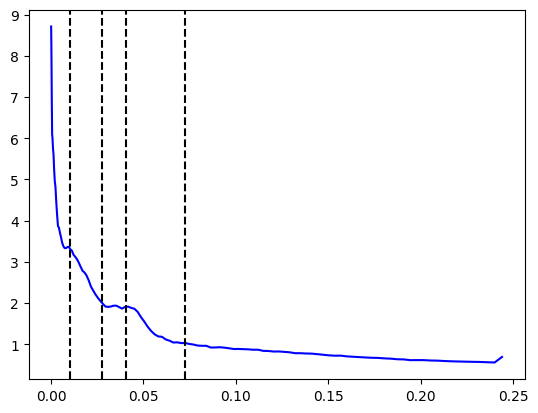

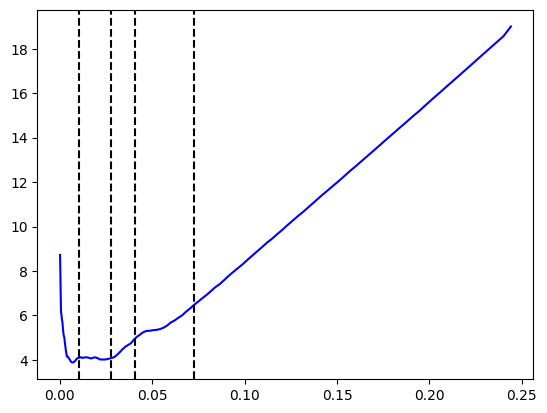

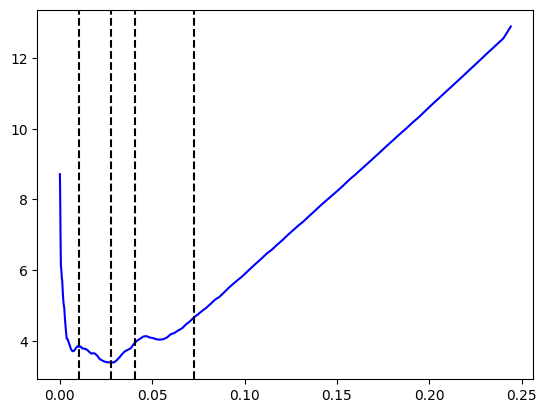

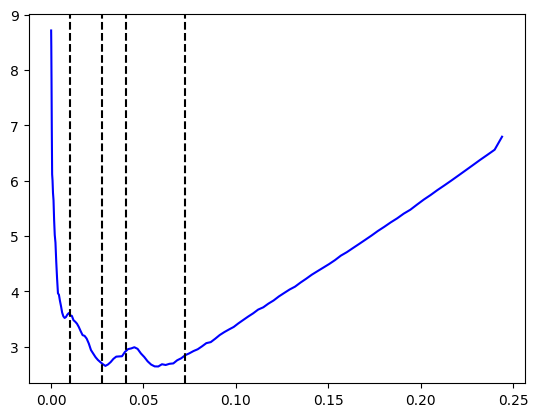

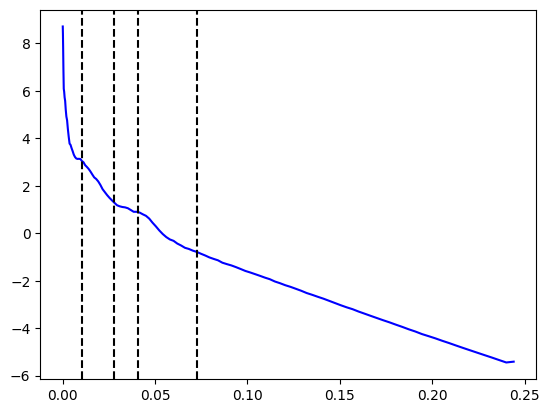

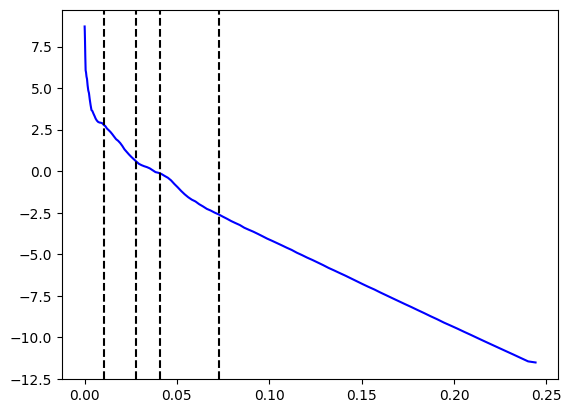

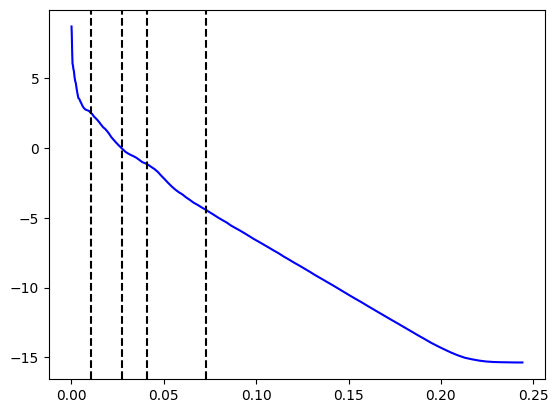

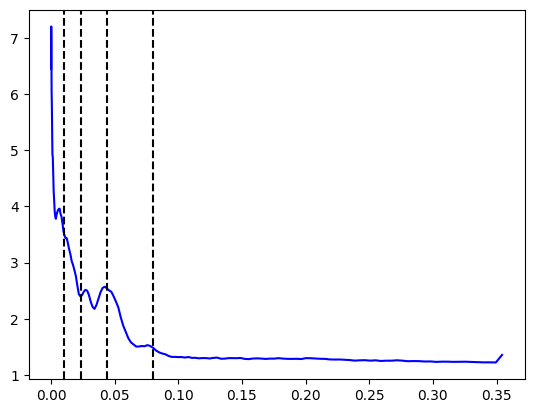

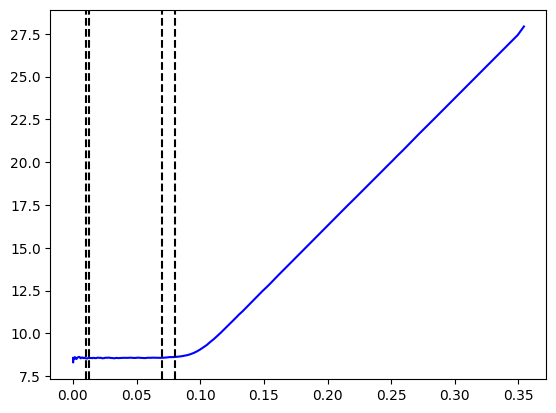

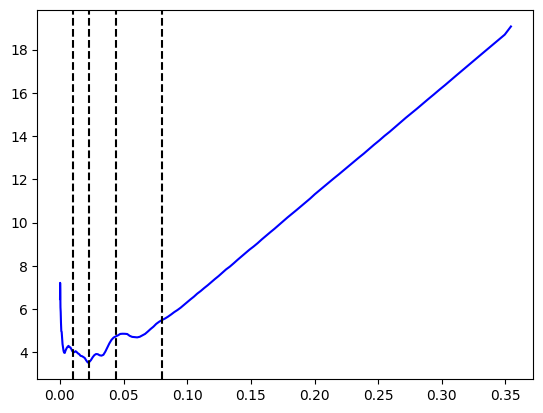

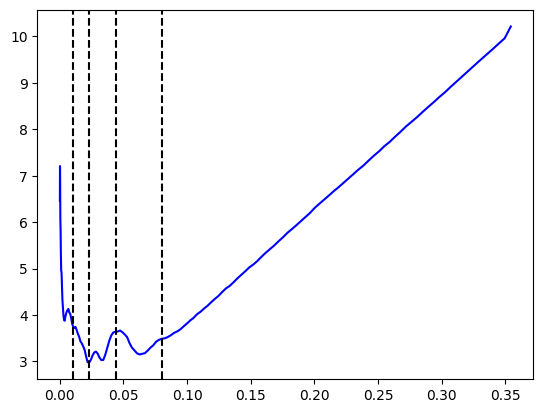

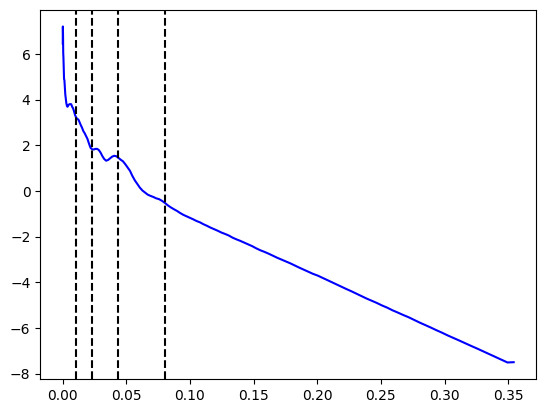

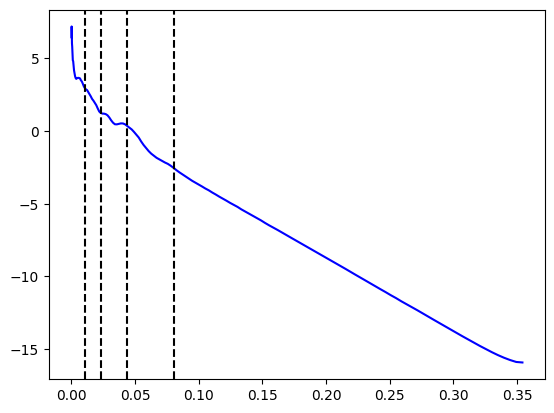

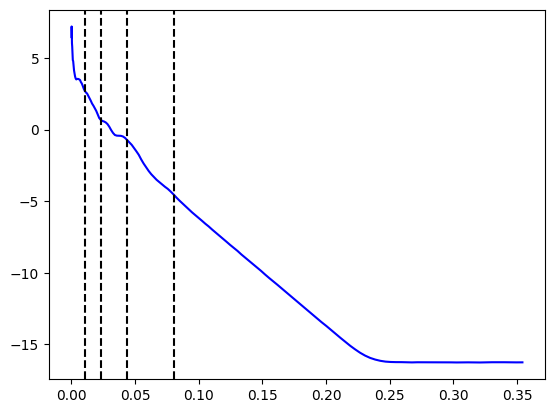

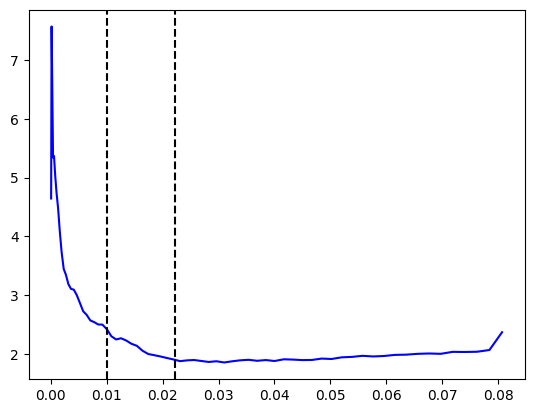

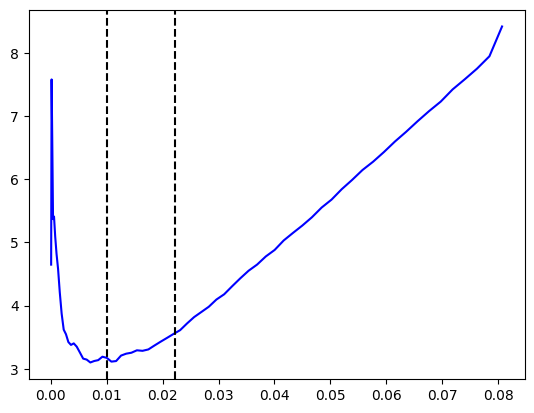

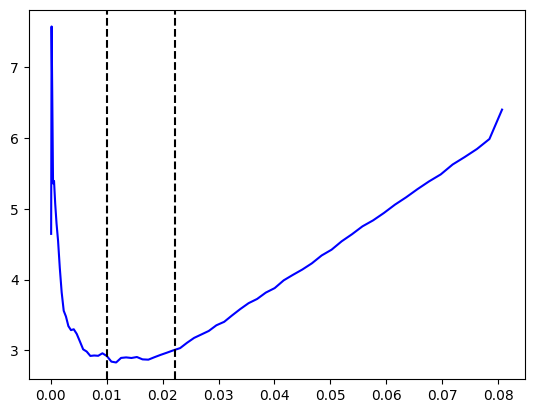

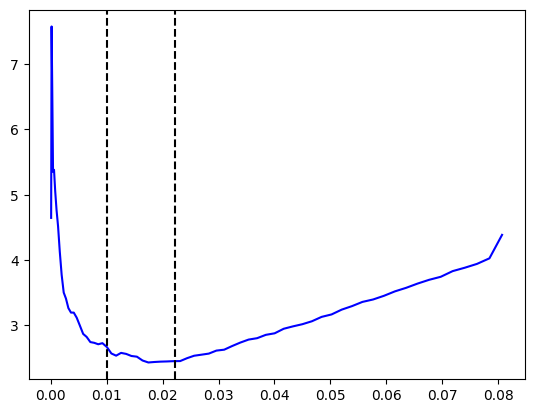

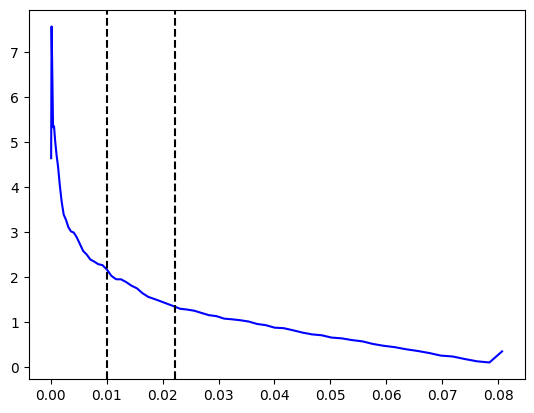

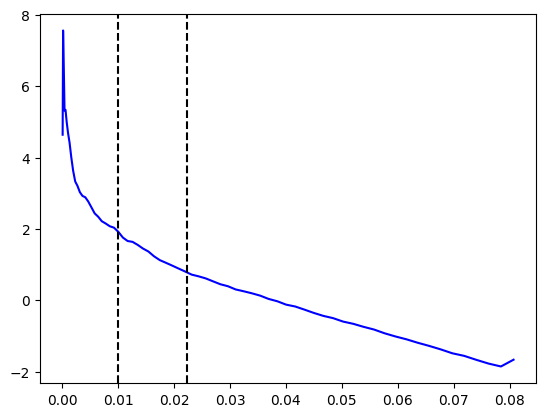

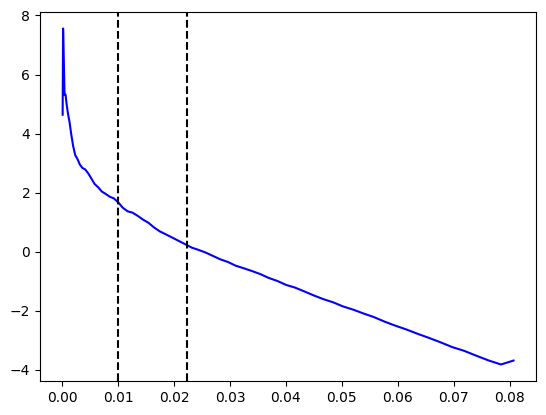

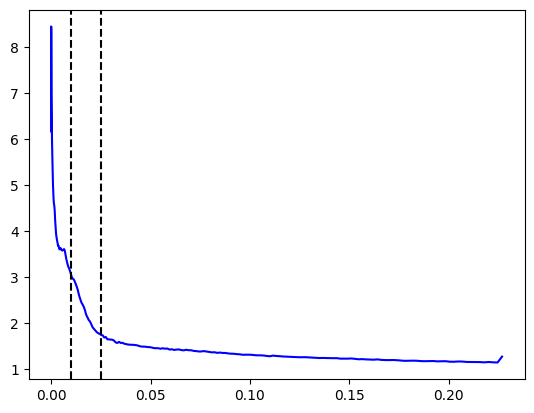

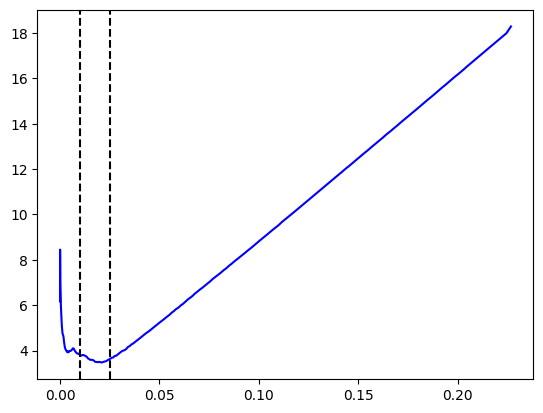

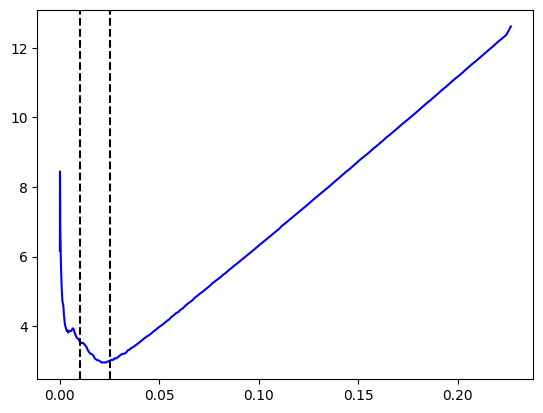

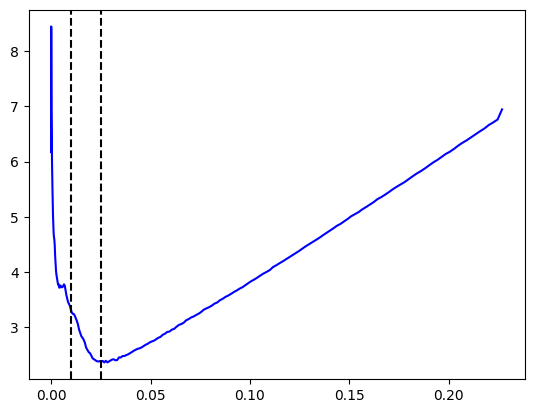

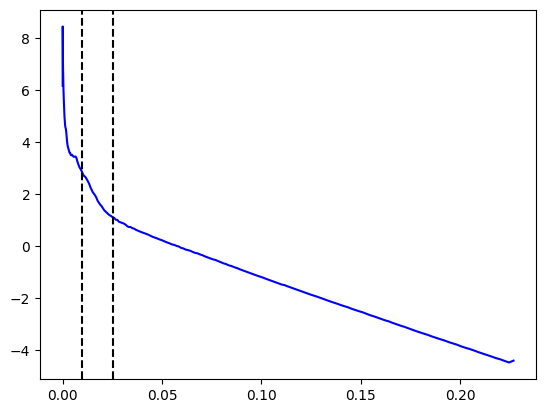

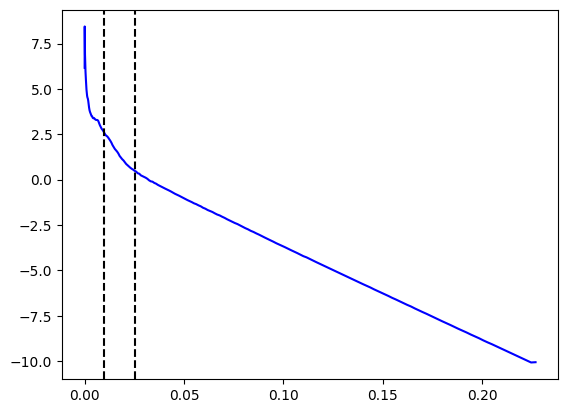

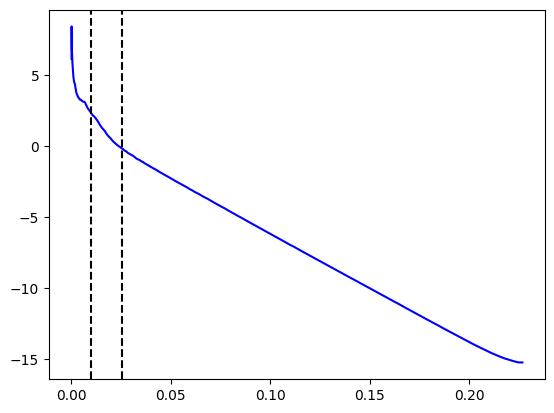

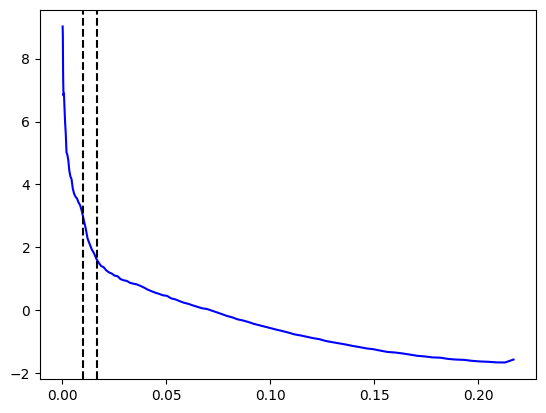

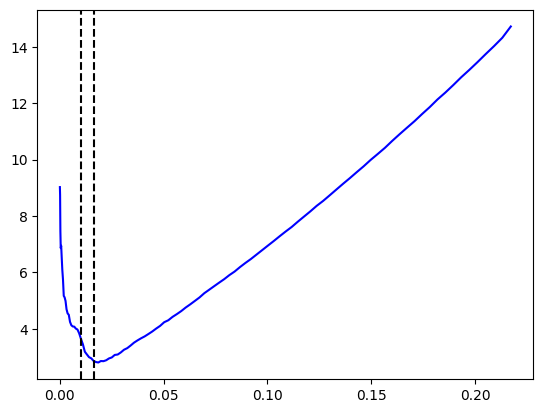

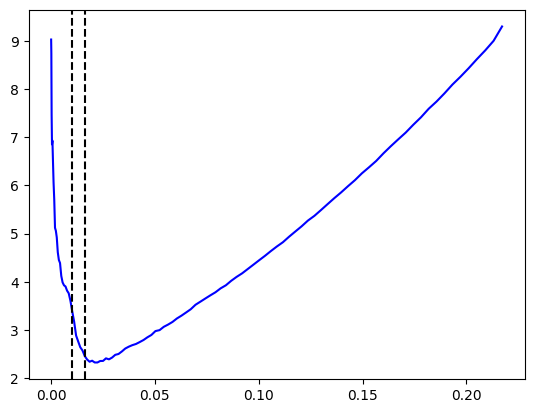

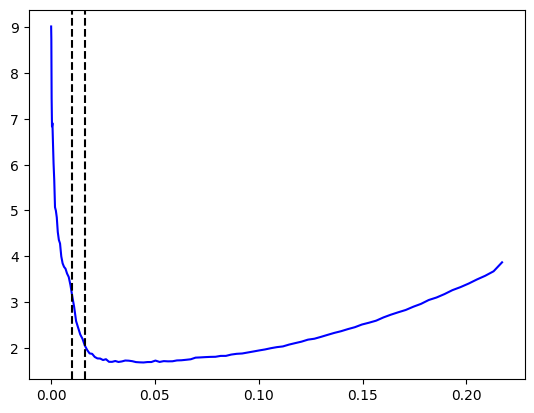

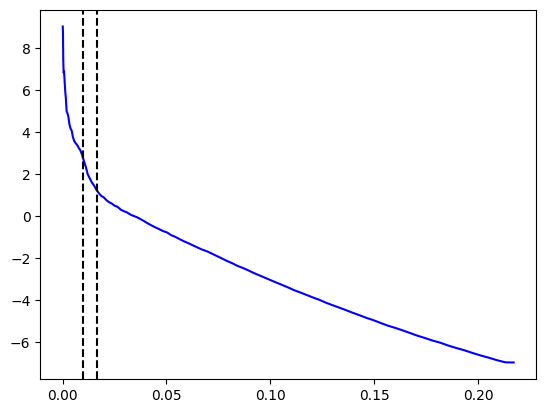

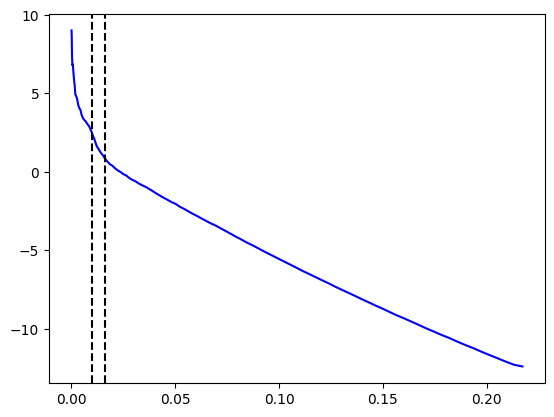

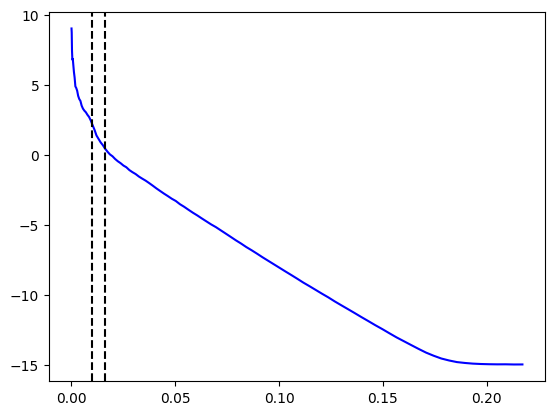

In [7]:
from locscale.include.emmer.ndimage.map_tools import sharpen_maps
from locscale.include.emmer.ndimage.map_tools import estimate_global_bfactor_map
from locscale.include.emmer.ndimage.map_utils import load_map, save_as_mrc
sharpening_bfactors = [-300, -200, -100, 100, 200, 300]
sharpened_bfactor_post = {}
sharpened_maps = {}
for emdb_pdb in copied_files.keys():
    print("===============================================")
    emdb, pdb = emdb_pdb.split("_")
    resolution = res_dict[emdb]
    unsharpened_map_path = copied_files[emdb_pdb]["unsharpened_map_file"]
    bfactor = estimate_global_bfactor_map(emmap_path=unsharpened_map_path, wilson_cutoff=10, fsc_cutoff=resolution, plot_profiles=True)[0]

    print(emdb_pdb, bfactor)
    emmap, apix = load_map(unsharpened_map_path)
    temp_map_paths = {}
    temp_bfactors = {}
    for b_sharpen in sharpening_bfactors:
        sharpened_map = sharpen_maps(emmap, apix, b_sharpen)
        sharpened_map_path = unsharpened_map_path.replace(".mrc", "_sharpened_{}.mrc".format(b_sharpen))
        save_as_mrc(sharpened_map, sharpened_map_path, apix=apix)
        sharpened_bfactor = estimate_global_bfactor_map(emmap_path=sharpened_map_path, wilson_cutoff=10, fsc_cutoff=resolution, plot_profiles=True)[0]
        temp_map_paths[b_sharpen] = sharpened_map_path
        temp_bfactors[b_sharpen] = sharpened_bfactor
        print(f"Sharpening bfactor: {b_sharpen},  Bfactor after sharpening: {sharpened_bfactor}")
    
    sharpened_maps[emdb_pdb] = temp_map_paths
    sharpened_bfactor_post[emdb_pdb] = temp_bfactors

        
        
    

In [8]:

# Run the qscore analysis
mapq_path = "/home/abharadwaj1/soft/mapq/mapq/mapq_cmd.py"
chimera_path = "/opt/ud/Chimera64-1.11.2/"
os.environ["PYTHONPATH"] = os.path.dirname(mapq_path)

qscore_commands_test_for_sharpening = {}

for emdb_pdbs in copied_files.keys():
    all_commands_for_this_emdb = {}
    cmd = []
    cmd.append("python")
    cmd.append(mapq_path)
    cmd.append(chimera_path)
    cmd.append(copied_files[emdb_pdbs]["unsharpened_map_file"])
    cmd.append(copied_files[emdb_pdbs]["copied_pdb_path"])
    
    emdb, pdb = emdb_pdbs.split("_")
    resolution = res_dict[emdb]

    np = 12

    cmd.append(f"res={resolution}")
    cmd.append(f"np={np}")
    all_commands_for_this_emdb['unsharpened_map'] = cmd

    for b_sharpen in sharpening_bfactors:
        cmd = []
        cmd.append("python")
        cmd.append(mapq_path)
        cmd.append(chimera_path)
        cmd.append(sharpened_maps[emdb_pdbs][b_sharpen])
        cmd.append(copied_files[emdb_pdbs]["copied_pdb_path"])
        cmd.append(f"res={resolution}")
        cmd.append(f"np={np}")
        all_commands_for_this_emdb[str(b_sharpen)] = cmd
    qscore_commands_test_for_sharpening[emdb_pdbs] = all_commands_for_this_emdb
    


In [9]:
qscore_pdb_filenames = {}
emdb_pdbs_present = list(copied_files.keys())
for emdb_pdbs in emdb_pdbs_present:
    copied_pdb_path = copied_files[emdb_pdbs]["copied_pdb_path"]
    unsharpened_map_file = copied_files[emdb_pdbs]["unsharpened_map_file"]
    sharpened_maps_basename = {}
    
    for b_sharpen in sharpening_bfactors:
        sharpened_maps_basename[b_sharpen] = os.path.basename(sharpened_maps[emdb_pdbs][b_sharpen])

    pdb_filename = os.path.basename(copied_pdb_path)
    unsharpened_map_file_basename = os.path.basename(unsharpened_map_file)
    
    qscores_directory = os.path.dirname(copied_pdb_path)
    
    pdb_to_unsharpened_qscore_file = os.path.join(qscores_directory, f"{pdb_filename}__Q__{unsharpened_map_file_basename}.pdb")
    pdb_to_sharpened_qscore_files = {}
    for b_sharpen in sharpening_bfactors:
        pdb_to_sharpened_temp_file = os.path.join(qscores_directory, f"{pdb_filename}__Q__{sharpened_maps_basename[b_sharpen]}.pdb")
        pdb_to_sharpened_qscore_files[b_sharpen] = pdb_to_sharpened_temp_file

    
    qscore_pdb_filenames[emdb_pdbs] = {
        "pdb_to_unsharpened_qscore_file": pdb_to_unsharpened_qscore_file,
        "pdb_to_sharpened_qscore_files": pdb_to_sharpened_qscore_files,
    }
    


In [ ]:
for emdb_pdb in emdb_pdbs_present:
    print("===============================================")
    for cmd in qscore_commands_test_for_sharpening[emdb_pdb].values():
        print(" ".join(cmd))
        print("---")


In [17]:

import subprocess
from locscale.include.emmer.pdb.pdb_utils import get_bfactors
import pickle
import numpy as np
qscores_analysis_directory = os.path.join(output_folder_qscore_analysis, "qscores_analysis")
if not os.path.exists(qscores_analysis_directory):
    os.makedirs(qscores_analysis_directory)
total_emdb_pdbs = len(emdb_pdbs_present)
qscore_results = {}
for emdb_pdbs in emdb_pdbs_present:
    print("===============================================")
    print(f"Running {emdb_pdbs} {emdb_pdbs_present.index(emdb_pdbs) + 1}/{total_emdb_pdbs}")
    for cmd in qscore_commands_test_for_sharpening[emdb_pdbs].values():
        print("Command: \n")
        print(" ".join(cmd))
        print("---")
        try:
            q = subprocess.run(cmd, check=True)
        except subprocess.CalledProcessError as e:
            print(f"Error in {emdb_pdbs} unsharpened map qscore analysis")
            print(e)
            continue
        print(f"Finished one Qscore analysis for {cmd[3]}")
        

    qscore_file_pdb = qscore_pdb_filenames[emdb_pdbs]["pdb_to_unsharpened_qscore_file"]
    qscores_list = np.array(get_bfactors(qscore_file_pdb))
    mean_qscore = np.mean(qscores_list)
    qscore_results[emdb_pdbs] = {
        "resolution": res_dict[emdb_pdbs.split("_")[0]],
        "unsharpened_map": mean_qscore
    }

    for b_sharpen in sharpening_bfactors:
        qscore_file_pdb = qscore_pdb_filenames[emdb_pdbs]["pdb_to_sharpened_qscore_files"][b_sharpen]
        qscores_list = np.array(get_bfactors(qscore_file_pdb))
        mean_qscore = np.mean(qscores_list)
        qscore_results[emdb_pdbs][b_sharpen] = mean_qscore


Running 0257_6hra 1/5
Command: 

python /home/abharadwaj1/soft/mapq/mapq/mapq_cmd.py /opt/ud/Chimera64-1.11.2/ /home/abharadwaj1/papers/elife_paper/figure_information/scripts/qscore_experiments/0257_6hra/EMD_257_unsharpened_fullmap.mrc /home/abharadwaj1/papers/elife_paper/figure_information/scripts/qscore_experiments/0257_6hra/PDB_6hra_unrefined_shifted_servalcat_refined.pdb res=3.7 np=12
---

Command Line Script - MapQ Version 1.9.11

Found parameters:
: /home/abharadwaj1/soft/mapq/mapq/mapq_cmd.py
 -> this script
: /opt/ud/Chimera64-1.11.2/
 -> Chimera path, Unix
: /home/abharadwaj1/papers/elife_paper/figure_information/scripts/qscore_experiments/0257_6hra/EMD_257_unsharpened_fullmap.mrc
 -> map
: /home/abharadwaj1/papers/elife_paper/figure_information/scripts/qscore_experiments/0257_6hra/PDB_6hra_unrefined_shifted_servalcat_refined.pdb
 -> PDB model
: res=3.7
 -> resolution: 3.700
: np=12
 -> number of processes: 12


Creating Chimera script in /home/abharadwaj1/papers/elife_paper/f

In [19]:
qscore_results['0257_6hra']

{'resolution': 3.7,
 'unsharpened_map': 0.3685172852250992,
 -300: -0.0025152524287198933,
 -200: -0.003085597984721434,
 -100: 0.04573581059046474,
 100: 0.2906313547415166,
 200: 0.24277130681587486,
 300: 0.21643002389780908}

In [33]:
pdfplots.close()

0257_6hra
7335_6c24
4141_5m1s
0026_6gl7
20352_6pik


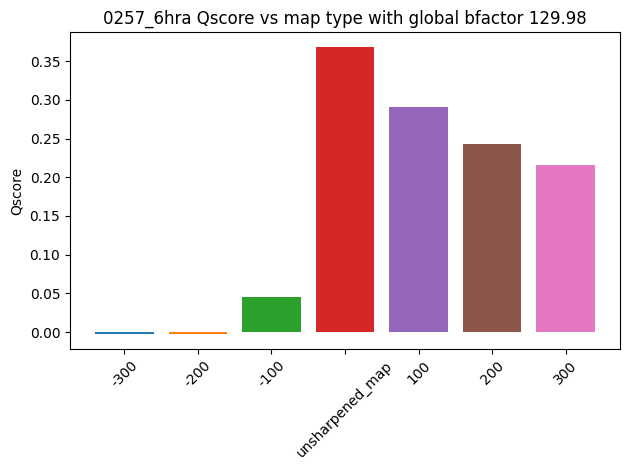

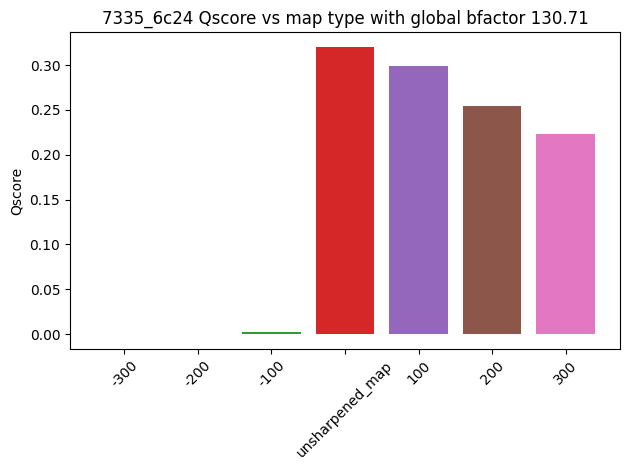

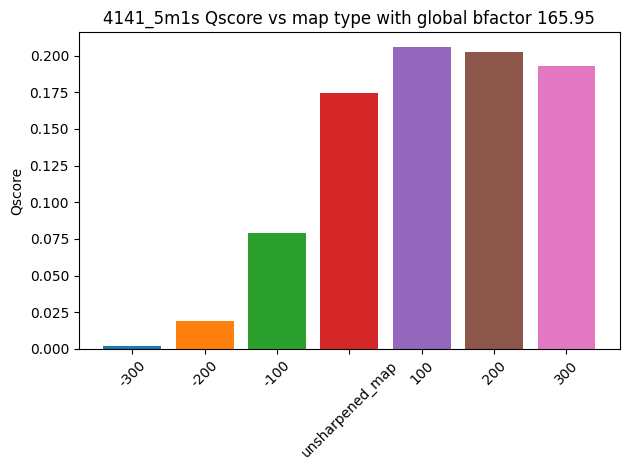

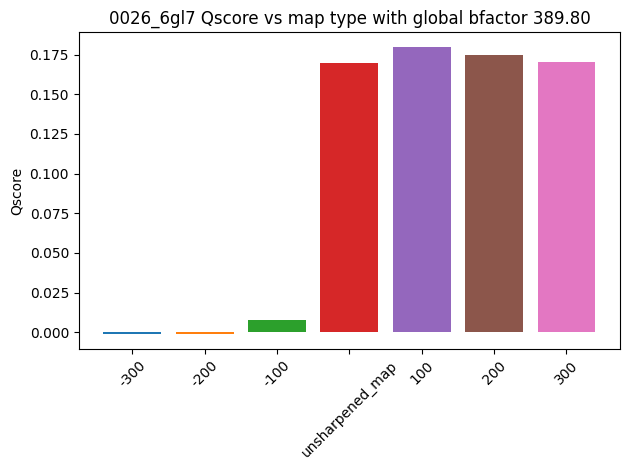

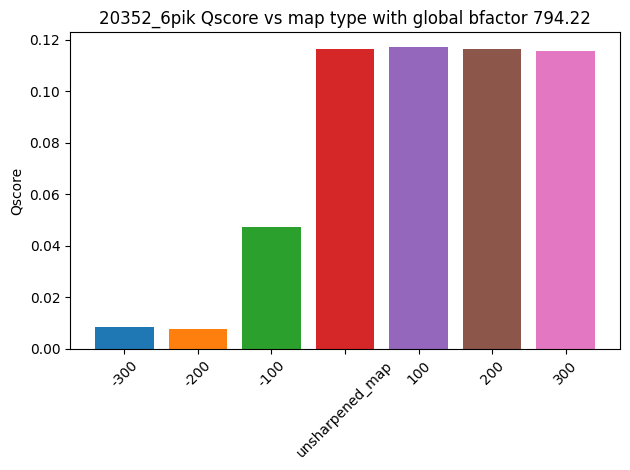

In [36]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pdfplots = PdfPages(os.path.join(qscores_analysis_directory, "qscore_plots.pdf"))
for emdb_pdb in qscore_results:
    fig = plt.figure()
    print(emdb_pdb)
    for key in [-300, -200, -100, 'unsharpened_map', 100, 200, 300]:
        plt.bar(str(key), qscore_results[emdb_pdb][key], label=key)
    plt.ylabel("Qscore")
    # rotate x ticks by 45
    plt.xticks(rotation=45)
    plt.title(f"{emdb_pdb} Qscore vs map type with global bfactor {global_bfactors[emdb_pdb]:.2f}")
    plt.tight_layout()
    pdfplots.savefig(fig)

pdfplots.close()

In [37]:
sharpened_bfactor_post

{'0257_6hra': {-300: -170.02431326356972,
  -200: -70.02315044666044,
  -100: 29.976837905855177,
  100: 229.9768320686116,
  200: 329.9768397482169,
  300: 429.97679562722806},
 '7335_6c24': {-300: -19.56123759999331,
  -200: -69.28239228000098,
  -100: 30.712310118196708,
  100: 230.7123044867768,
  200: 330.62132580538315,
  300: 430.71230593325424},
 '4141_5m1s': {-300: -134.04901870845322,
  -200: -34.049024095726516,
  -100: 65.9509769069265,
  100: 265.9509746178214,
  200: 365.9509739414965,
  300: 465.9509757279011},
 '0026_6gl7': {-300: 89.75355653252197,
  -200: 189.79664581424746,
  -100: 289.79642544283564,
  100: 489.7964238363375,
  200: 589.7964233800883,
  300: 689.7964232164028},
 '20352_6pik': {-300: 494.2270604310232,
  -200: 594.2228798178429,
  -100: 694.2229820842648,
  100: 894.2229794663671,
  200: 994.2229832406138,
  300: 1094.2229692997244}}